<a href="https://colab.research.google.com/github/unsecuredAMRAP/602/blob/main/07_assignment_FA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [ ]:
# import csv data set

# Import necessary libraries
import pandas as pd
import numpy as np

csv_path = "https://github.com/unsecuredAMRAP/602/releases/download/dbs/RePORTER_PRJ_C_FY2023.csv"

# CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

In [3]:
# Explore the data
print(df.head())  # first few rows

   APPLICATION_ID ACTIVITY ADMINISTERING_IC  APPLICATION_TYPE ARRA_FUNDED  \
0         8530931      I50               VA               1.0           N   
1         9075408      I50               VA               5.0           N   
2         9701510      R01               DK               7.0           N   
3         9722309      R01               MH               5.0           N   
4        10003845      R01               FD               5.0           N   

  AWARD_NOTICE_DATE BUDGET_START  BUDGET_END  CFDA_CODE CORE_PROJECT_NUM  ...  \
0        2023-08-28   2012-10-01  2013-09-30      999.0      I50HX001175  ...   
1        2023-09-06   2015-10-01  2016-09-30      999.0      I50HX001676  ...   
2        2023-04-18   2023-01-01  2024-12-31      847.0      R01DK056123  ...   
3        2023-05-16   2023-05-01  2024-04-30      242.0      R01MH115504  ...   
4        2023-08-29   2023-09-01  2024-08-31      103.0      R01FD006106  ...   

  SERIAL_NUMBER STUDY_SECTION  \
0          1175  

In [2]:
# summary statistics
categorical_vars = ['ACTIVITY', 'STUDY_SECTION', 'STUDY_SECTION_NAME']
continuous_vars = ['DIRECT_COST_AMT', 'INDIRECT_COST_AMT', 'TOTAL_COST']

continuous_summary = df[continuous_vars].describe()
print("Continuous Variables Summary:")
print(continuous_summary)

categorical_summary = df[categorical_vars].describe()
print("Categorical Variables Summary:")
print(categorical_summary)

Continuous Variables Summary:
       DIRECT_COST_AMT  INDIRECT_COST_AMT    TOTAL_COST
count     7.731400e+04       7.731100e+04  7.118100e+04
mean      3.971353e+05       1.414550e+05  6.251905e+05
std       1.796170e+06       2.487798e+05  2.870870e+06
min      -4.455900e+04       0.000000e+00  0.000000e+00
25%       1.441632e+05       2.794350e+04  1.937500e+05
50%       2.500000e+05       1.096230e+05  3.997500e+05
75%       4.145800e+05       1.792630e+05  6.319320e+05
max       4.172015e+08       1.462945e+07  4.172015e+08
Categorical Variables Summary:
       ACTIVITY STUDY_SECTION                       STUDY_SECTION_NAME
count     84548         77801                                    77801
unique      154           416                                     5691
top         R01          ZRG1  Cancer Centers Study Section (A)[NCI-A]
freq      30272         16553                                     1327


# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables.

8. Filter your data based on some condition.

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group.
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups.

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

In [9]:
# 1 creating a subset with a few of the variables
subset_vars = ['ACTIVITY', 'STUDY_SECTION', 'STUDY_SECTION_NAME', 'DIRECT_COST_AMT', 'INDIRECT_COST_AMT', 'TOTAL_COST', 'APPLICATION_ID', 'ORG_CITY', 'ORG_COUNTRY', 'FUNDING_MECHANISM', 'FUNDING_ICs']
df_subset = df[subset_vars].copy()

# modify column names
df_subset.rename(columns={'ORG_CITY': 'city', 'ORG_COUNTRY': 'country'}, inplace=True)


In [10]:
# 2 Checking data types for step 3
print(df_subset.dtypes)

# Convert numeric columns from string to float
df_subset['DIRECT_COST_AMT'] = pd.to_numeric(df_subset['DIRECT_COST_AMT'], errors='coerce')
df_subset['INDIRECT_COST_AMT'] = pd.to_numeric(df_subset['INDIRECT_COST_AMT'], errors='coerce')
df_subset['TOTAL_COST'] = pd.to_numeric(df_subset['TOTAL_COST'], errors='coerce')



ACTIVITY               object
STUDY_SECTION          object
STUDY_SECTION_NAME     object
DIRECT_COST_AMT       float64
INDIRECT_COST_AMT     float64
TOTAL_COST            float64
APPLICATION_ID          int64
city                   object
country                object
FUNDING_MECHANISM      object
FUNDING_ICs            object
dtype: object


After checking data types, all seem to be appropriate. But just to be sure (especially if additional data is added to this dataset to update it for 2024 fiscal year, I have added lines to convert important continuous variables to numeric.

In [7]:
# 3 Check for missing values
print(df_subset.isnull().sum())

ACTIVITY                  0
STUDY_SECTION          6747
STUDY_SECTION_NAME     6747
DIRECT_COST_AMT        7234
INDIRECT_COST_AMT      7237
TOTAL_COST            13367
APPLICATION_ID            0
city                   3185
country                3185
FUNDING_MECHANISM         0
FUNDING_ICs            2191
dtype: int64


There are no missing values by Funding mechanism, activity, or ID (as would be expected), but there were many missing values for Total_cost as well as other important variables. Since this is the original dataset directly from the NIH, there is no better source to fill the missing values. Furthermore, I think these are missing because they do not exist in the first place (ie, certain award mechanisms may not contain the total cost and amounts). Therfore, the best approach is to remove those rows if my analysis focuses on the amounts themselves. (which is what I have done later below).

In [11]:
# 4 new columns
df_subset['sum'] = df_subset['DIRECT_COST_AMT'] + df_subset['INDIRECT_COST_AMT']

In [12]:
# 5 drop columns
df_subset.drop(['ACTIVITY', 'STUDY_SECTION'], axis=1, inplace=True)

In [13]:
# 6 drop rows where TOTAL_COST < 100,000
df_subset = df_subset[df_subset['TOTAL_COST'] >= 100000]

In [14]:
# 7 sort and filter the data
# sort data by TOTAL_COST in descending order, then by DIRECT_COST_AMT in ascending order
df_subset.sort_values(by=['TOTAL_COST', 'DIRECT_COST_AMT'], ascending=[False, True], inplace=True)


In [35]:
# 8 filter data by country, keeping only rows where country is "UNITED STATES"
df_subset = df_subset[df_subset['country'].str.upper() == 'UNITED STATES']


In [16]:
# 9 Convert String Values
# convert all string values in the country column to lower case
df_subset['country'] = df_subset['country'].str.lower()

In [17]:
# 10 check for numeric values in STUDY_SECTION_NAME
df_subset['STUDY_SECTION_NAME_has_numeric'] = df_subset['STUDY_SECTION_NAME'].str.contains(r'\d', regex=True)


In [18]:
# 11 roup and aggregate Data
# group by FUNDING_MECHANISM and get mean, min, and max of TOTAL_COST
grouped_funding_mechanism = df_subset.groupby('FUNDING_MECHANISM')['TOTAL_COST'].agg(['mean', 'min', 'max'])

print("Grouped by FUNDING_MECHANISM:")
print(grouped_funding_mechanism)

Grouped by FUNDING_MECHANISM:
                                 mean        min          max
FUNDING_MECHANISM                                            
CONSTRUCTION GRANTS      7.333256e+06  3999070.0    8000000.0
NON SBIR/STTR CONTRACTS  2.623810e+06   100000.0  277585346.0
NON-SBIR/STTR RPGS       5.945445e+05   100000.0   76222582.0
OTHER RESEARCH-RELATED   4.284751e+05   100000.0   32364105.0
OTHERS                   4.904551e+06   102263.0  417201451.0
RESEARCH CENTERS         1.699834e+06   100000.0   16177759.0
SBIR-STTR RPGS           6.588746e+05   100000.0    3235980.0
SBIR/STTR CONTRACTS      8.654992e+05   298496.0    2999641.0
TRAINING, INSTITUTIONAL  4.039998e+05   101309.0    3018783.0


In [21]:
# 12 group by FUNDING_MECHANISM and FUNDING_ICs, then sort within groups
grouped_multiple = df_subset.groupby(['FUNDING_MECHANISM', 'FUNDING_ICs'])['TOTAL_COST'].agg(['mean', 'min', 'max']).sort_values(by=['FUNDING_MECHANISM', 'mean'], ascending=[True, False])

print("\nGrouped by FUNDING_MECHANISM and FUNDING_ICs:")
print(grouped_multiple)


Grouped by FUNDING_MECHANISM and FUNDING_ICs:
                                                    mean        min        max
FUNDING_MECHANISM       FUNDING_ICs                                           
CONSTRUCTION GRANTS     OD:8000000\            8000000.0  8000000.0  8000000.0
                        OD:7999408\            7999408.0  7999408.0  7999408.0
                        OD:7996073\            7996073.0  7996073.0  7996073.0
                        OD:7916788\            7916788.0  7916788.0  7916788.0
                        OD:7897996\            7897996.0  7897996.0  7897996.0
...                                                  ...        ...        ...
TRAINING, INSTITUTIONAL NIDDK:104282\           104282.0   104282.0   104282.0
                        NIA:102689\             102689.0   102689.0   102689.0
                        NIDDK:102689\           102689.0   102689.0   102689.0
                        NIDDK:101762\           101762.0   101762.0   101762.0
     

In [34]:
# but the number of rows for this table is way too big, so limiting it to only FUNDING_ICs that are either AHRQ (agency for healthcare research and quality) and where the FUNDING_MECHANISM is "OTHER RESEARCH-RELATED".
filtered_df_subset = df_subset[
    (df_subset['FUNDING_ICs'].str.contains('AHRQ', na=False)) &
    (df_subset['FUNDING_MECHANISM'] == 'OTHER RESEARCH-RELATED')
]

# also going to drop rows where TOTAL_COST is missing or zero
filtered_df_subset = filtered_df_subset.dropna(subset=['TOTAL_COST'])
filtered_df_subset = filtered_df_subset[filtered_df_subset['TOTAL_COST'] > 0]

# groupby operation on the filtered DataFrame
grouped_multiple = filtered_df_subset.groupby(['FUNDING_MECHANISM', 'FUNDING_ICs'])['TOTAL_COST'].agg(['mean', 'min', 'max']).sort_values(by=['FUNDING_MECHANISM', 'mean'], ascending=[True, False])

print(grouped_multiple)

                                           mean        min        max
FUNDING_MECHANISM      FUNDING_ICs                                   
OTHER RESEARCH-RELATED AHRQ:1499998\  1499998.0  1499998.0  1499998.0
                       AHRQ:1467207\  1467207.0  1467207.0  1467207.0
                       AHRQ:1438873\  1438873.0  1438873.0  1438873.0
                       AHRQ:1431988\  1431988.0  1431988.0  1431988.0
                       AHRQ:1319988\  1319988.0  1319988.0  1319988.0
...                                         ...        ...        ...
                       AHRQ:134933\    134933.0   134933.0   134933.0
                       AHRQ:125375\    125375.0   125375.0   125375.0
                       AHRQ:123617\    123617.0   123617.0   123617.0
                       AHRQ:123108\    123108.0   123108.0   123108.0
                       AHRQ:117992\    117992.0   117992.0   117992.0

[161 rows x 3 columns]


In [36]:
# summary statistics of the TOTAL_COST stratified by FUNDING_ICs
# filter the dataframe based on FUNDING_ICs and FUNDING_MECHANISM
filtered_df_subset = df_subset[
    (df_subset['FUNDING_ICs'].str.contains('AHRQ|FDA|NCI|NHLBI', na=False)) &
    (df_subset['FUNDING_MECHANISM'] == "OTHER RESEARCH-RELATED")
]

# remove rows where TOTAL_COST is missing or zero
filtered_df_subset = filtered_df_subset[
    (filtered_df_subset['TOTAL_COST'].notna()) &
    (filtered_df_subset['TOTAL_COST'] > 0)
]

# summary stats
total_cost_summary = filtered_df_subset.groupby('FUNDING_ICs')['TOTAL_COST'].describe()

print(total_cost_summary)

                                                 count       mean  std  \
FUNDING_ICs                                                              
AHRQ:1000000\                                      3.0  1000000.0  0.0   
AHRQ:1008001\                                      1.0  1008001.0  NaN   
AHRQ:1040699\                                      1.0  1040699.0  NaN   
AHRQ:117992\                                       1.0   117992.0  NaN   
AHRQ:123108\                                       1.0   123108.0  NaN   
...                                                ...        ...  ...   
NHLBI:820509\                                      1.0   820509.0  NaN   
NHLBI:83950\OD:83950\                              1.0   167900.0  NaN   
NHLBI:917737\                                      1.0   917737.0  NaN   
NHLBI:922405\NIDDK:62500\NIMHD:62500\OD:131250\    1.0  1178655.0  NaN   
NHLBI:928890\                                      1.0   928890.0  NaN   

                                     

In [37]:
# There are many FUNDING_ICs that contain AHRQ, and same for others. I want to group all of the FUNDING_ICs that contain AHRQ, and same for the others

# a new column for the categorized FUNDING_ICs
def categorize_funding_ics(value):
    if 'AHRQ' in value:
        return 'AHRQ'
    elif 'FDA' in value:
        return 'FDA'
    elif 'NCI' in value:
        return 'NCI'
    elif 'NHLBI' in value:
        return 'NHLBI'
    else:
        return 'Other'

# function to create a new column
filtered_df_subset['FUNDING_ICs_GROUP'] = filtered_df_subset['FUNDING_ICs'].apply(categorize_funding_ics)

# filter based on FUNDING_MECHANISM being "OTHER RESEARCH-RELATED"
filtered_df_subset = filtered_df_subset[filtered_df_subset['FUNDING_MECHANISM'] == "OTHER RESEARCH-RELATED"]

# again removing rows where TOTAL_COST is missing or zero
filtered_df_subset = filtered_df_subset[
    (filtered_df_subset['TOTAL_COST'].notna()) &
    (filtered_df_subset['TOTAL_COST'] > 0)
]

# summary statistics of TOTAL_COST, stratified by the new FUNDING_ICs_GROUP
total_cost_summary_grouped = filtered_df_subset.groupby('FUNDING_ICs_GROUP')['TOTAL_COST'].describe()

print(total_cost_summary_grouped)

                   count           mean           std       min        25%  \
FUNDING_ICs_GROUP                                                            
AHRQ               177.0  469771.090395  3.392649e+05  117992.0  152480.00   
FDA                 58.0  835089.758621  2.062949e+06  100000.0  204982.25   
NCI                872.0  734962.239679  1.596621e+06  100000.0  187002.00   
NHLBI              960.0  221736.679167  3.195238e+05  100000.0  149006.25   

                        50%        75%         max  
FUNDING_ICs_GROUP                                   
AHRQ               398921.0  500000.00   1499998.0  
FDA                369922.0  593611.25  15636891.0  
NCI                260796.0  675759.50  18423048.0  
NHLBI              167146.0  187059.75   5695000.0  


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

This is a very nice dataset that I am personally very interested in. As someone who has applied to the NIH before, and who plans to submit more grant proposals to all of the NIH (NCI and NHLBI) as well as AHRQ, I find this exercise super helpful.

I think there are certain quirks to handle when working on this dataset. For example, the same funding institute has several labels which makes it difficult to stratify by. This is why I had to group together all of the FUNDING_ICs that contain AHRQ (as well as others).

Also, from the last descriptive statistical analysis regarding the total amount of the grant stratified by FUNDING_ICs_Group, it looks like AHRQ gives out the largest grants since the median is highest, followied by the FDA, NCI, and NHLBI. However, there are certainly some outliers since the mean tells a different story with the order being FDA > NCI > AHRQ > NHLBI. The median is more accurate to get a better idea given this skewed distribution.



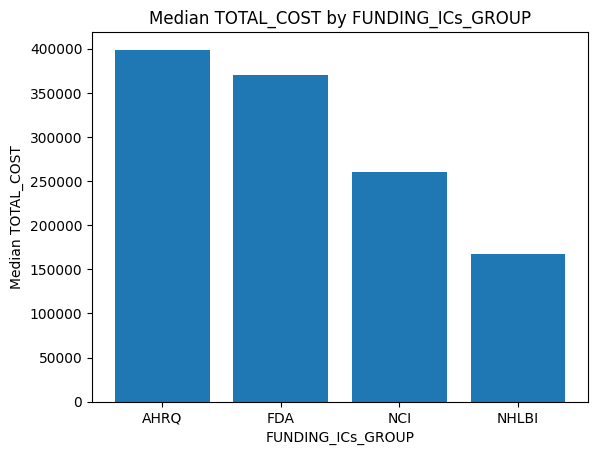

In [38]:
# barplot of median TOTAL_COST stratified by FUNDING_ICs_GROUP
import matplotlib.pyplot as plt

plt.bar(total_cost_summary_grouped.index, total_cost_summary_grouped['50%'])
plt.xlabel('FUNDING_ICs_GROUP')
plt.ylabel('Median TOTAL_COST')
plt.title('Median TOTAL_COST by FUNDING_ICs_GROUP')
plt.show()


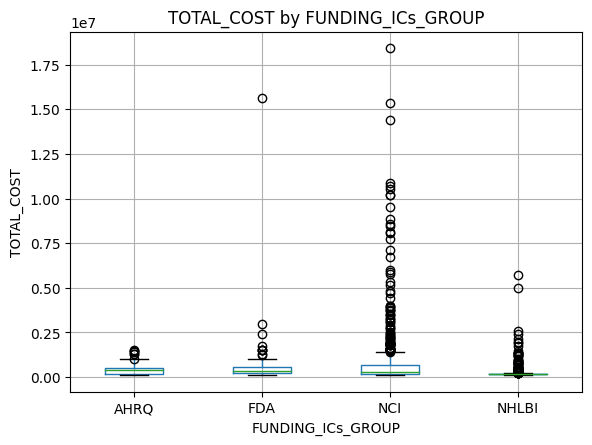

In [40]:
# boxplot of TOTAL_COST stratified by FUNDING_ICs_GROUP
filtered_df_subset.boxplot(column='TOTAL_COST', by='FUNDING_ICs_GROUP')
plt.xlabel('FUNDING_ICs_GROUP')
plt.ylabel('TOTAL_COST')
plt.title('TOTAL_COST by FUNDING_ICs_GROUP')
plt.suptitle('')
plt.show()


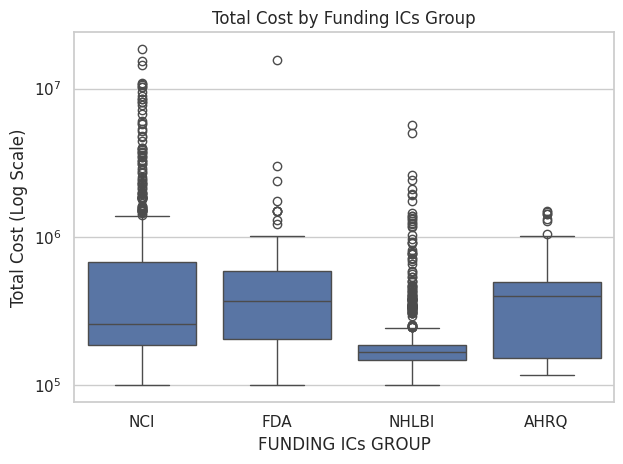

In [41]:
# using seaborn for a nicer looking plot, and also using a log scale for the outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# boxplot with seaborn to handle outliers also
ax = sns.boxplot(x='FUNDING_ICs_GROUP', y='TOTAL_COST', data=filtered_df_subset)

# a log scale to the y-axis to make differences more clear
ax.set_yscale('log')

plt.xlabel('FUNDING ICs GROUP')
plt.ylabel('Total Cost (Log Scale)')
plt.title('Total Cost by Funding ICs Group')

plt.tight_layout()  # avoid overlapping

plt.show()


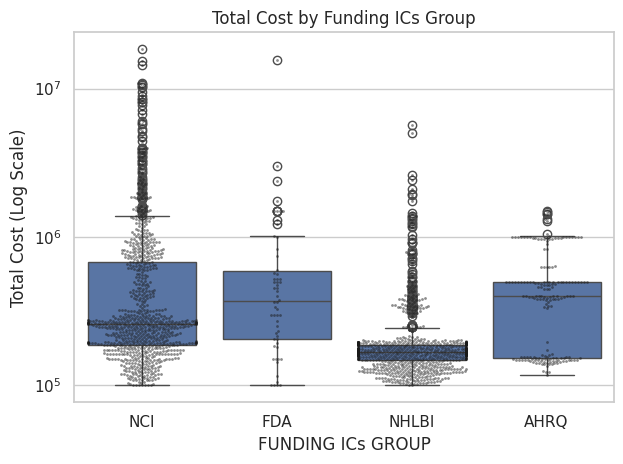

In [42]:
# Adding a layer that shows the actual data poits
sns.set(style="whitegrid")

# boxplot with seaborn to handle outliers also
ax = sns.boxplot(x='FUNDING_ICs_GROUP', y='TOTAL_COST', data=filtered_df_subset)

# a log scale to the y-axis to make differences more clear
ax.set_yscale('log')

# Optional: Add swarmplot to show the actual data points
sns.swarmplot(x='FUNDING_ICs_GROUP', y='TOTAL_COST', data=filtered_df_subset, color='k', alpha=0.5, size=2)

plt.xlabel('FUNDING ICs GROUP')
plt.ylabel('Total Cost (Log Scale)')
plt.title('Total Cost by Funding ICs Group')

plt.tight_layout()  # avoid overlapping

plt.show()
